In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.svm import SVR, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score
from sklearn.kernel_ridge import KernelRidge

# Load dataset
file_path = "heart_failure_clinical_records_with_severity.csv"
df = pd.read_csv(file_path)

# Display dataset info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
 13  Severity                  299 non-null    float64
dtypes: float64

In [2]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())



Summary Statistics:
              age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.0

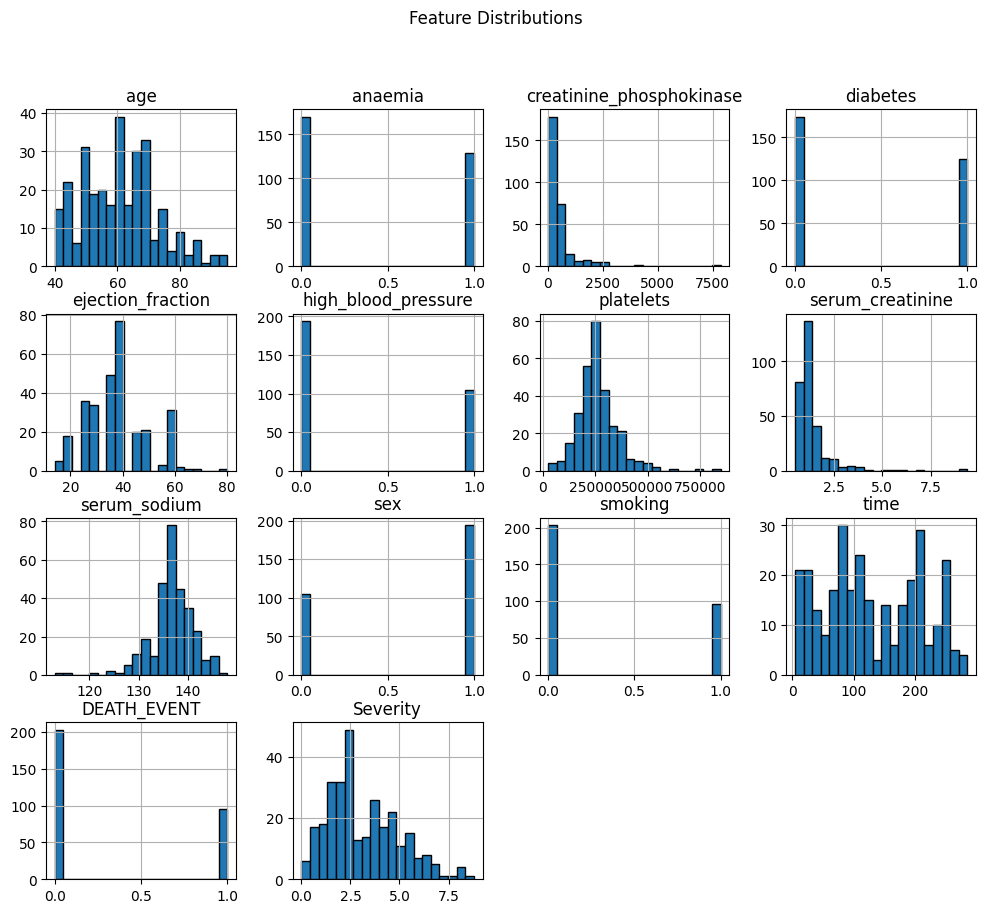

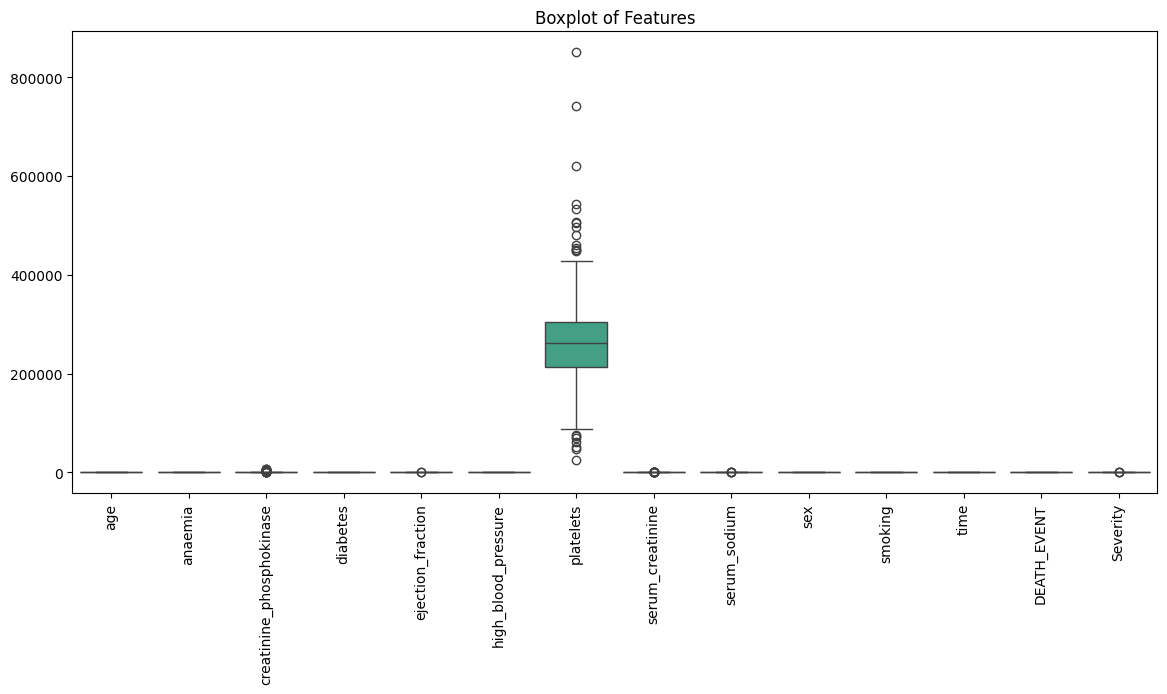

In [3]:
# Histograms
df.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle("Feature Distributions")
plt.show()

# Boxplot for outlier detection
plt.figure(figsize=(14, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplot of Features")
plt.show()


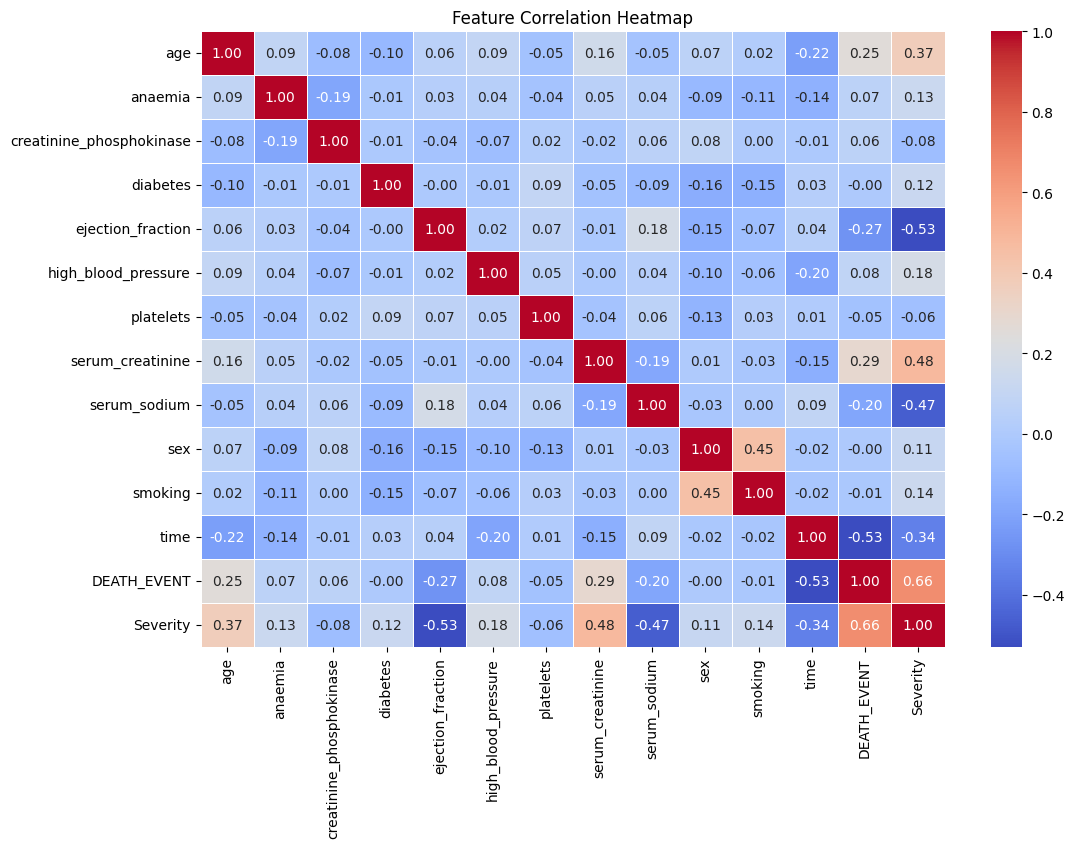

In [4]:
# Heatmap of feature correlations
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


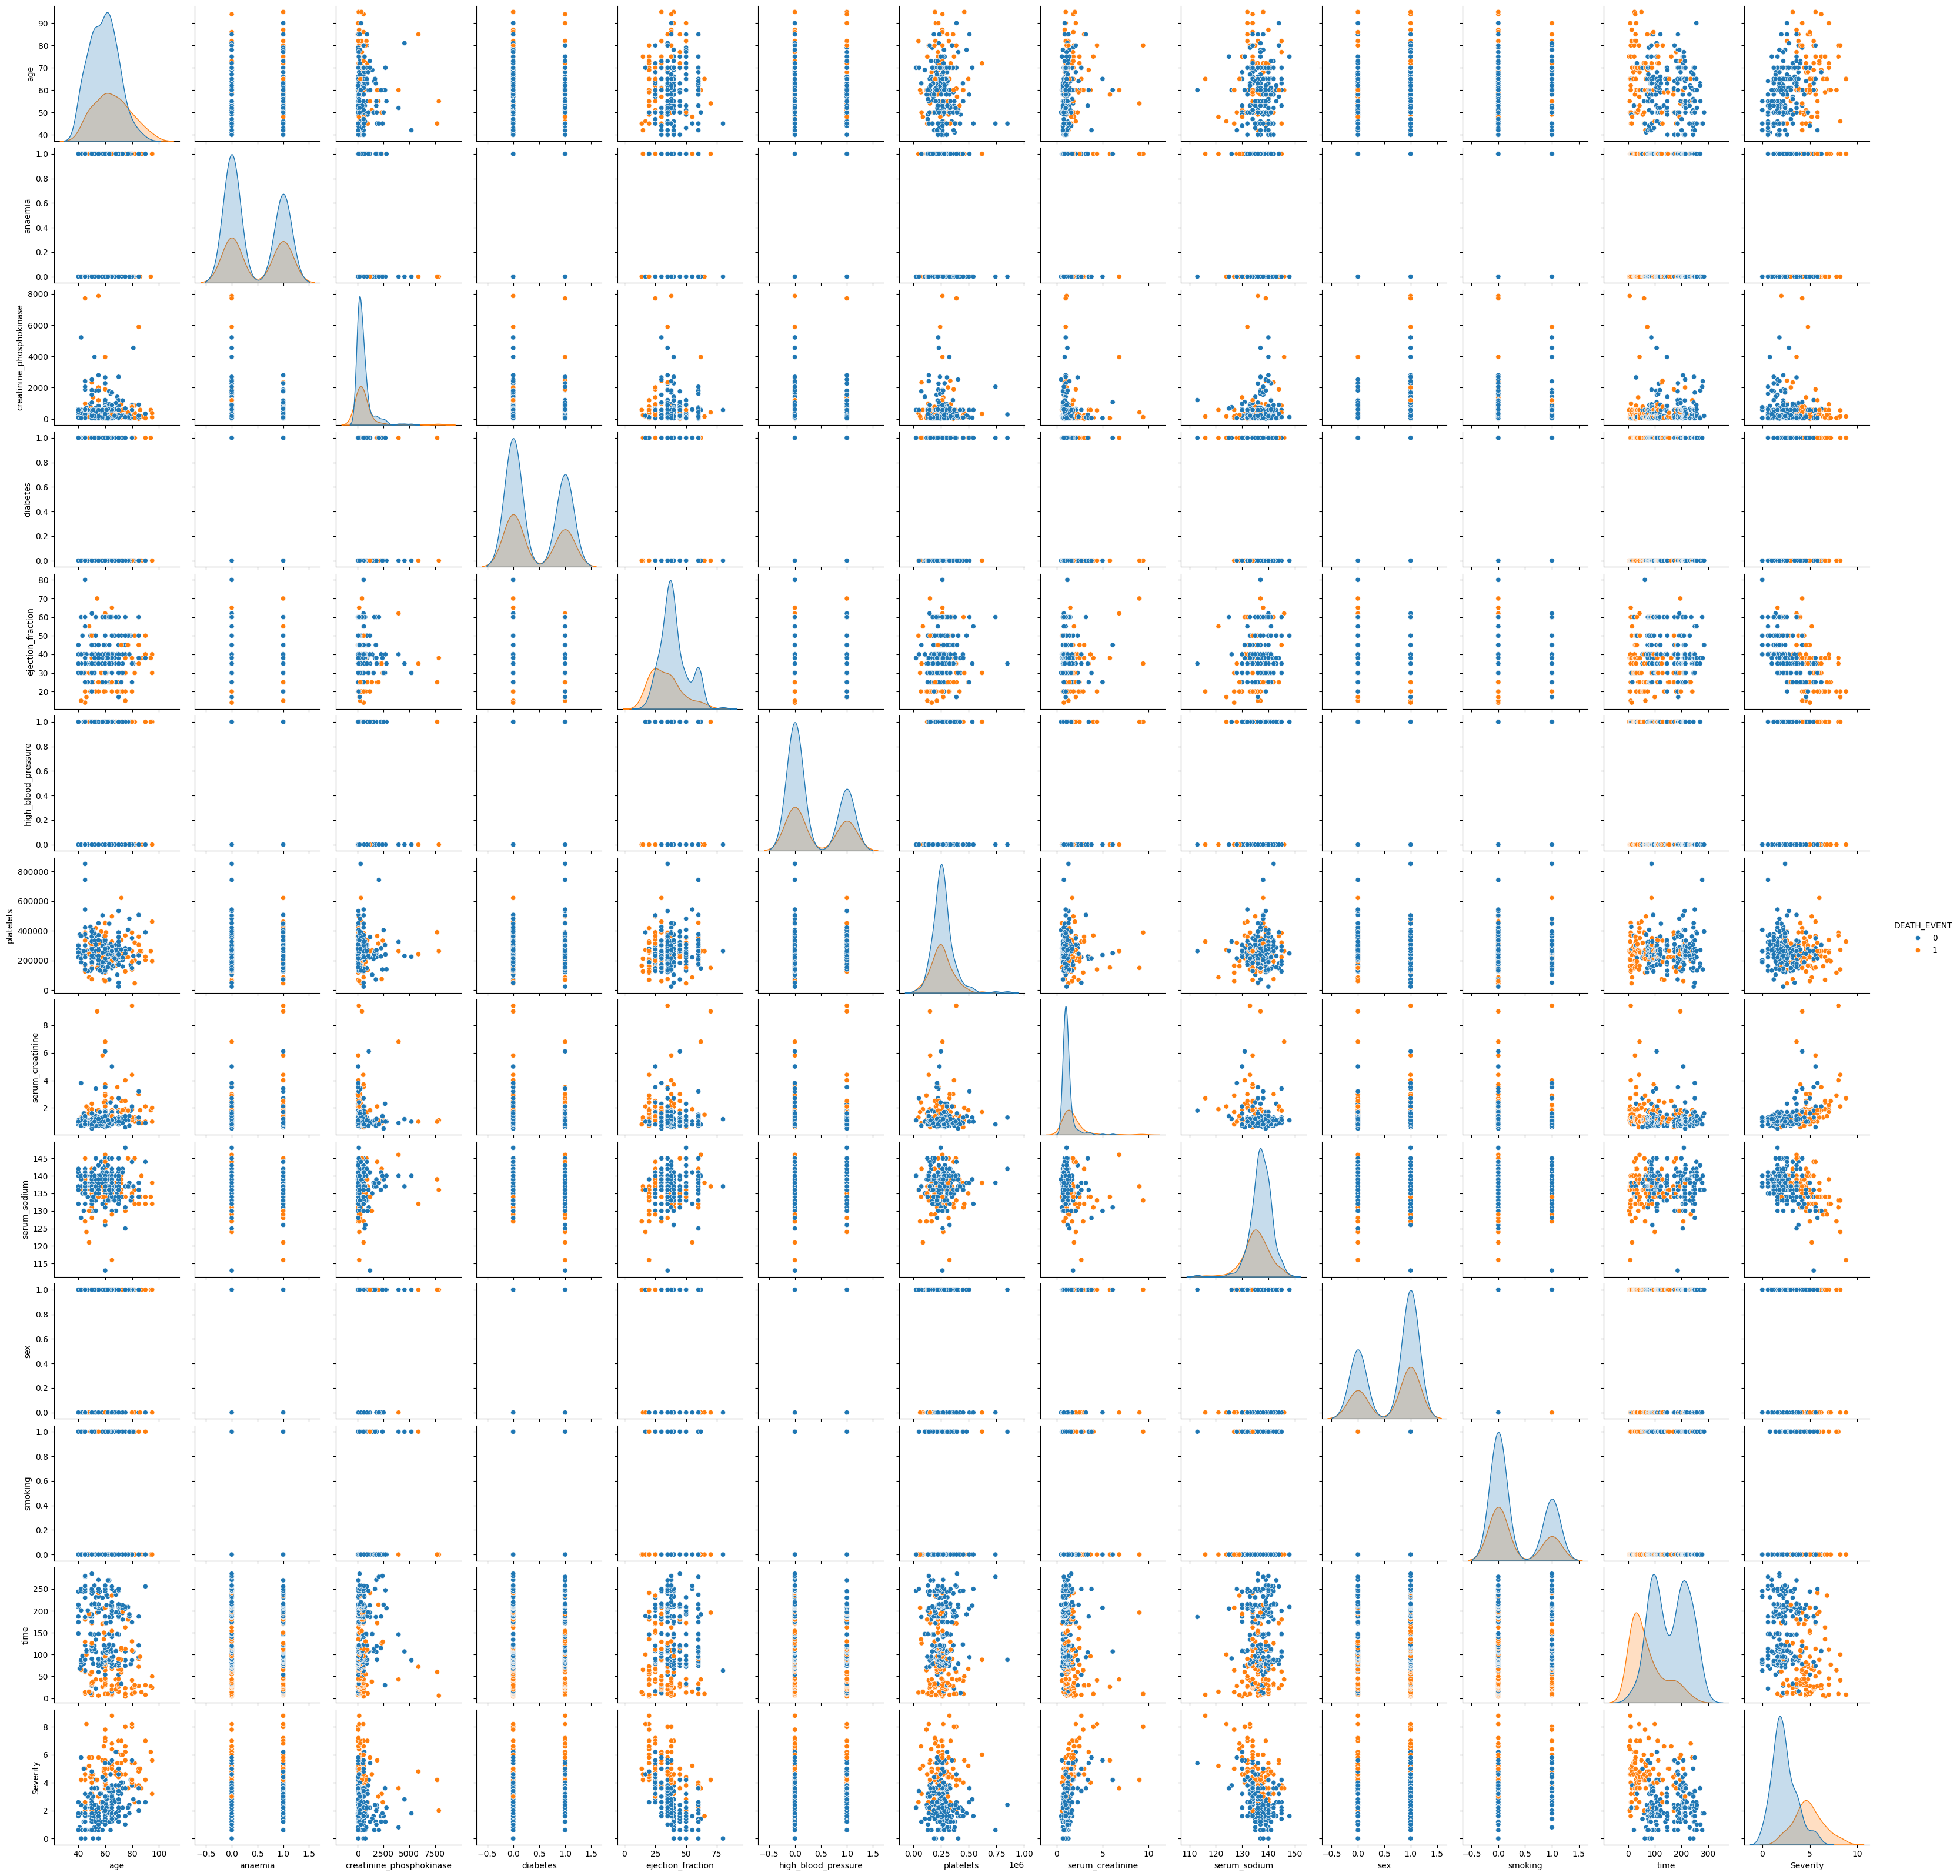

In [5]:
# Pairplot for feature interaction with DEATH_EVENT
sns.pairplot(df, hue="DEATH_EVENT", diag_kind="kde")
plt.show()


In [6]:
# Define features and target for regression (excluding 'DEATH_EVENT')
X_reg = df.drop(columns=["DEATH_EVENT", "Severity"])
y_reg = df["Severity"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)


In [7]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Lasso Regression (Feature Importance)
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
lasso_features = pd.Series(lasso_model.coef_, index=X_reg.columns)


In [8]:
# Kernel Regression
kernel_model = KernelRidge(kernel='rbf')
kernel_model.fit(X_train, y_train)
y_pred_kernel = kernel_model.predict(X_test)



Regression Model Evaluation:
Linear Regression:
  MSE: 0.8519
  R² Score: 0.7300

Ridge Regression:
  MSE: 0.8441
  R² Score: 0.7325

Lasso Regression:
  MSE: 0.8925
  R² Score: 0.7171

Kernel Regression:
  MSE: 13.9793
  R² Score: -3.4305



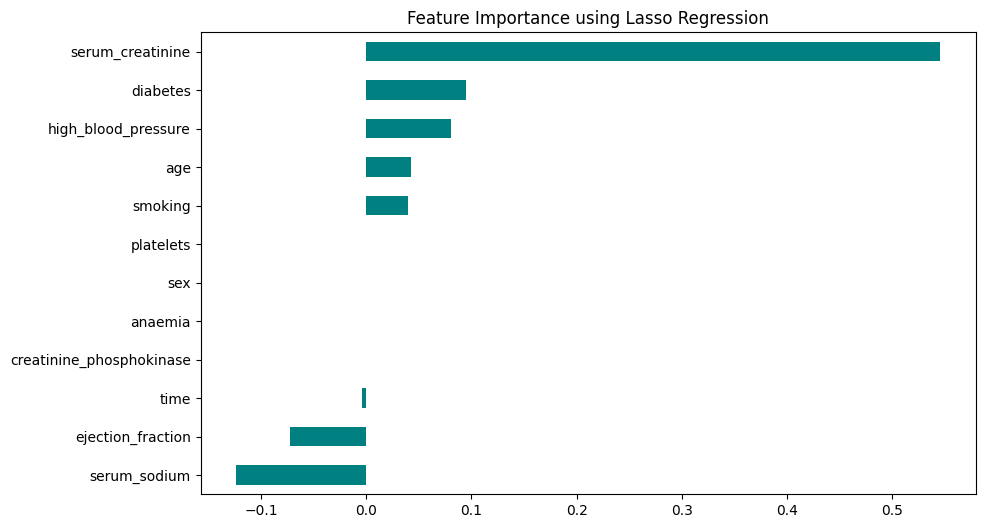

In [9]:
print("\nRegression Model Evaluation:")
for name, y_pred in zip(["Linear", "Ridge", "Lasso", "Kernel"], 
                         [y_pred_linear, y_pred_ridge, y_pred_lasso, y_pred_kernel]):
    print(f"{name} Regression:")
    print(f"  MSE: {mean_squared_error(y_test, y_pred):.4f}")
    print(f"  R² Score: {r2_score(y_test, y_pred):.4f}\n")

# Lasso Feature Importance Plot
plt.figure(figsize=(10, 6))
lasso_features.sort_values().plot(kind='barh', color='teal')
plt.title("Feature Importance using Lasso Regression")
plt.show()


In [10]:
# Define features and target for classification (excluding 'Severity')
X_cls = df.drop(columns=["DEATH_EVENT", "Severity"])
y_cls = df["DEATH_EVENT"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)


In [11]:
# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

# SVM Classifier
svm_model = SVC(kernel="rbf")
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Naïve Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)


c:\Users\Ays\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
print("\nClassification Model Evaluation:")
for name, y_pred in zip(["Logistic Regression", "SVM", "Random Forest", "Naïve Bayes"], 
                         [y_pred_logistic, y_pred_svm, y_pred_rf, y_pred_nb]):
    print(f"{name}:")
    print(f"  Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"  Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"  Recall: {recall_score(y_test, y_pred):.4f}\n")



Classification Model Evaluation:
Logistic Regression:
  Accuracy: 0.8167
  Precision: 0.9375
  Recall: 0.6000

SVM:
  Accuracy: 0.5833
  Precision: 0.0000
  Recall: 0.0000

Random Forest:
  Accuracy: 0.7500
  Precision: 0.8571
  Recall: 0.4800

Naïve Bayes:
  Accuracy: 0.7333
  Precision: 0.9091
  Recall: 0.4000



c:\Users\Ays\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


c:\Users\Ays\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


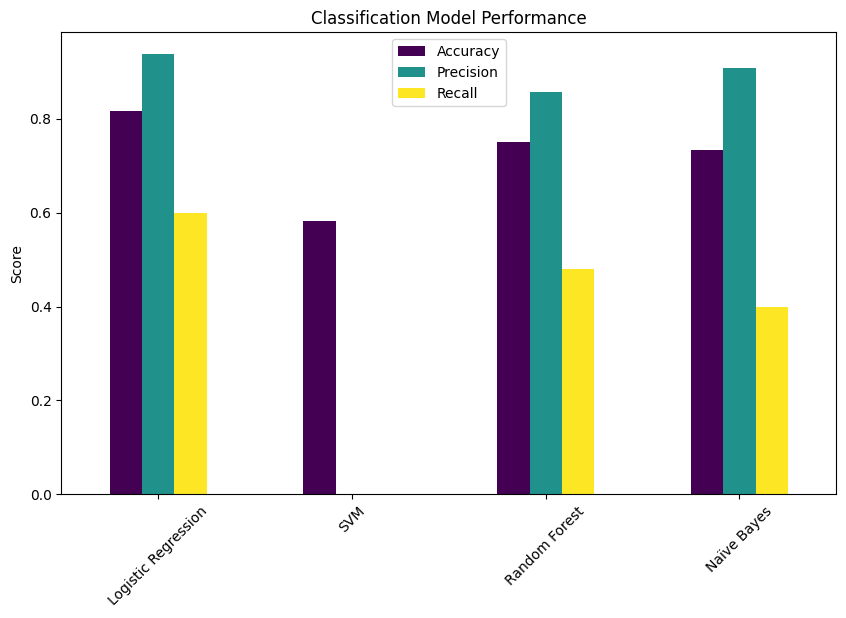

In [ ]:
# Bar plot for model comparison
metrics = ["Accuracy", "Precision", "Recall"]
models = ["Logistic Regression", "SVM", "Random Forest", "Naïve Bayes"]
values = [
    [accuracy_score(y_test, y_pred_logistic), precision_score(y_test, y_pred_logistic), recall_score(y_test, y_pred_logistic)],
    [accuracy_score(y_test, y_pred_svm), precision_score(y_test, y_pred_svm), recall_score(y_test, y_pred_svm)],
    [accuracy_score(y_test, y_pred_rf), precision_score(y_test, y_pred_rf), recall_score(y_test, y_pred_rf)],
    [accuracy_score(y_test, y_pred_nb), precision_score(y_test, y_pred_nb), recall_score(y_test, y_pred_nb)]
]

# Convert to DataFrame for visualization
metrics_df = pd.DataFrame(values, columns=metrics, index=models)
metrics_df.plot(kind="bar", figsize=(10,6), colormap="viridis")
plt.title("Classification Model Performance")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.show()


#Logistic Regression performed the best overall, with 81.67% accuracy, high precision (93.75%), but moderate recall (60%), meaning it correctly 
# predicted most survival cases but missed some actual deaths. Random Forest was also strong, with 75% accuracy and good precision (85.71%), but 
# had a lower recall (48%), suggesting it misclassified some deaths. Naïve Bayes had 73.33% accuracy, high precision (90.91%), but the lowest 
# recall (40%), meaning it struggled to identify actual deaths. SVM performed poorly, failing to predict any deaths correctly (0% recall), likely 
# due to dataset imbalance or hyperparameter issues. To improve recall, models should use class balancing techniques, and Random Forest could 
# benefit from hyperparameter tuning. Logistic Regression remains the best choicd due to its balance of accuracy and precision.

Logistic Regression performed the best overall, with 81.67% accuracy, high precision (93.75%), but moderate recall (60%), meaning it correctly predicted most survival cases but missed some actual deaths. Random Forest was also strong, with 75% accuracy and good precision (85.71%), but had a lower recall (48%), suggesting it misclassified some deaths. Naïve Bayes had 73.33% accuracy, high precision (90.91%), but the lowest recall (40%), meaning it struggled to identify actual deaths. SVM performed poorly, failing to predict any deaths correctly (0% recall), likely due to dataset imbalance or hyperparameter issues. To improve recall, models should use class balancing techniques, and Random Forest could benefit from hyperparameter tuning. Logistic Regression remains the best choicd due to its balance of accuracy and precision.